<a href="https://colab.research.google.com/github/KritiJain01/AI-Lab/blob/main/AIAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import shlex
from datetime import datetime
read = open("/content/drive/MyDrive/CSAI/Year 2/Artificial Intelligence/access.log", "r")
hasil = open("/content/drive/MyDrive/CSAI/Year 2/Artificial Intelligence/access.csv", "x")


hasil.write("ip_address,identd,userid,time,request_line,status_code,object_size,referrer,user_agent\n")
for line in read:
    #print(line)
    if ("." or '"') in line:
        splited_line = shlex.split(line)
        splited_line[3] = splited_line[3] + " " + splited_line[4]
        splited_line.pop(4)

        splited_line[3] = splited_line[3].strip("[")
        splited_line[3] = splited_line[3].strip("]")
        splited_line[3] = datetime.strptime(splited_line[3],"%d/%b/%Y:%H:%M:%S %z").strftime("%Y-%m-%d %H:%M:%S")

        print(splited_line)
        converted_line = ""
        for word in splited_line:
            converted_line = converted_line + "\"" + word.strip() + "\"" + ","
        hasil.write(converted_line+"\n")

print("finish")

['83.149.9.216', '-', '-', '2015-05-17 10:05:03', 'GET /presentations/logstash-monitorama-2013/images/kibana-search.png HTTP/1.1', '200', '203023', 'http://semicomplete.com/presentations/logstash-monitorama-2013/', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36']
['83.149.9.216', '-', '-', '2015-05-17 10:05:43', 'GET /presentations/logstash-monitorama-2013/images/kibana-dashboard3.png HTTP/1.1', '200', '171717', 'http://semicomplete.com/presentations/logstash-monitorama-2013/', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36']
['83.149.9.216', '-', '-', '2015-05-17 10:05:47', 'GET /presentations/logstash-monitorama-2013/plugin/highlight/highlight.js HTTP/1.1', '200', '26185', 'http://semicomplete.com/presentations/logstash-monitorama-2013/', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.17

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
log_df = pd.read_csv("/content/drive/MyDrive/CSAI/Year 2/Artificial Intelligence/access.csv", index_col = False)

In [39]:
log_df.head()

,ip_address,identd,userid,time,request_line,status_code,object_size,referrer,user_agent
0,83.149.9.216,-,-,2015-05-17 10:05:03,GET /presentations/logstash-monitorama-2013/im...,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
1,83.149.9.216,-,-,2015-05-17 10:05:43,GET /presentations/logstash-monitorama-2013/im...,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
2,83.149.9.216,-,-,2015-05-17 10:05:47,GET /presentations/logstash-monitorama-2013/pl...,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
3,83.149.9.216,-,-,2015-05-17 10:05:12,GET /presentations/logstash-monitorama-2013/pl...,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
4,83.149.9.216,-,-,2015-05-17 10:05:07,GET /presentations/logstash-monitorama-2013/pl...,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...


In [40]:
# Count total number of http codes
log_df['referrer'].describe()

count     4094
unique     300
top          -
freq      1800
Name: referrer, dtype: object

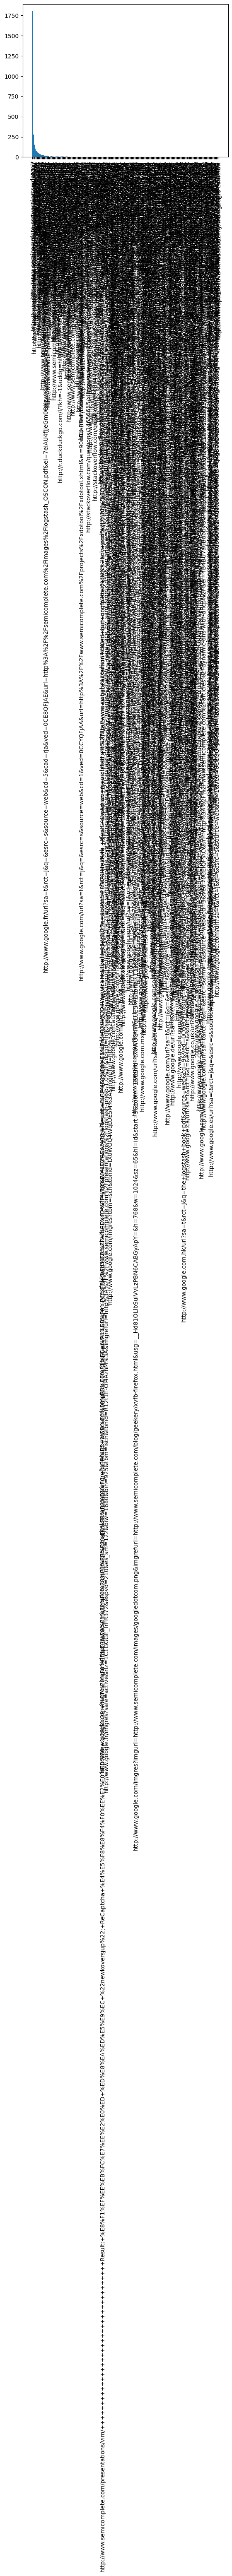

In [68]:
# Most hits by URL, thus finding the URL with most hits
URL = pd.DataFrame(log_df['referrer'].value_counts())
URL.index.name = 'id'
URL.reset_index(inplace = True)
URL
plt.bar(URL['id'], URL['referrer'])
plt.xticks(rotation = 90)
plt.show()

In [21]:
ipaddresses = log_df.groupby('ip_address')

In [22]:
ipaddresses.head()

,ip_address,identd,userid,time,request_line,status_code,object_size,referrer,user_agent
0,83.149.9.216,-,-,2015-05-17 10:05:03,GET /presentations/logstash-monitorama-2013/im...,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
1,83.149.9.216,-,-,2015-05-17 10:05:43,GET /presentations/logstash-monitorama-2013/im...,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
2,83.149.9.216,-,-,2015-05-17 10:05:47,GET /presentations/logstash-monitorama-2013/pl...,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
3,83.149.9.216,-,-,2015-05-17 10:05:12,GET /presentations/logstash-monitorama-2013/pl...,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
4,83.149.9.216,-,-,2015-05-17 10:05:07,GET /presentations/logstash-monitorama-2013/pl...,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
...,...,...,...,...,...,...,...,...,...
4085,31.208.44.206,-,-,2015-05-18 20:05:34,GET /projects/keynav/ HTTP/1.1,200,18985,-,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
4086,31.208.44.206,-,-,2015-05-18 20:05:33,GET /reset.css HTTP/1.1,200,1015,http://www.semicomplete.com/projects/keynav/,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
4087,31.208.44.206,-,-,2015-05-18 20:05:37,GET /style2.css HTTP/1.1,200,4877,http://www.semicomplete.com/projects/keynav/,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
4088,31.208.44.206,-,-,2015-05-18 20:05:45,GET /favicon.ico HTTP/1.1,200,3638,-,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
